In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
from scipy.linalg import norm, eigh
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA
import plotly_express as px

## PCA

In [2]:
TFIDF_L2 = pd.read_csv('TFIDF_L2.csv')
TFIDF_L2.set_index('review_id', inplace=True)

LIB = pd.read_csv('LIB.csv')
LIB.set_index('review_id', inplace=True)

VOCAB = pd.read_csv('VOCAB.csv')
VOCAB.set_index('term_str', inplace=True)

In [3]:
def get_pca(TFIDF, 
            k=10, 
            norm_docs=True,
            norm_level=2,
            center_by_mean=True, 
            center_by_variance=False):
    
    if norm_docs:
        # TFIDF = TFIDF.apply(lambda x: x / norm(x), 1).fillna(0)
        TFIDF = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
    
    if center_by_mean:
        TFIDF = TFIDF - TFIDF.mean()
        
    if center_by_variance:
        TFIDF = TFIDF / TFIDF.std()        

    COV = TFIDF.cov()

    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
        
    EIG_IDX = EIG_VAL.eig_val.sort_values(ascending=False).head(k)
    
    COMPS = EIG_VEC[EIG_IDX.index].T
    COMPS.index = [i for i in range(COMPS.shape[0])]
    COMPS.index.name = 'pc_id'
    
    LOADINGS = COMPS.T

    DCM = TFIDF.dot(LOADINGS)
    
    COMPINF = pd.DataFrame(index=COMPS.index)
    
    LIB_COLS = ['Genre']

    DCM = DCM.join(LIB[LIB_COLS], on='review_id')

    for i in range(k):
        for j in [0, 1]:
            top_terms = ' '.join(LOADINGS.sort_values(i, ascending=bool(j)).head(5).index.to_list())
            COMPINF.loc[i, j] = top_terms
    COMPINF = COMPINF.rename(columns={0:'pos', 1:'neg'})
    
    COMPINF['eig_val'] = EIG_IDX.reset_index(drop=True).to_frame()
    COMPINF['exp_var'] = COMPINF.eig_val / COMPINF.eig_val.sum()
    
    LOADINGS = LOADINGS.join(VOCAB['max_pos_group'], on='term_str')
    
    return LOADINGS, DCM, COMPINF

In [4]:
max_terms = 5000
tf_method = 'max'
global_term_sig = 'dfidf'
n_comps = 10
center_by_mean=False
center_by_variance=False

In [5]:
VIDX = VOCAB[VOCAB.max_pos.isin(['NN','NNS'])].sort_values('dfidf', ascending=False).head(max_terms).index

In [6]:
TFIDF_L2[VIDX]

time     story    people       way    movies      film  \
review_id                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.016656   
1          0.000000  0.000000  0.040337  0.000000  0.000000  0.000000   
2          0.024047  0.026586  0.030100  0.000000  0.000000  0.000000   
3          0.000000  0.036296  0.000000  0.000000  0.000000  0.017239   
4          0.000000  0.000000  0.000000  0.015015  0.000000  0.024876   
...             ...       ...       ...       ...       ...       ...   
4995       0.029086  0.000000  0.000000  0.000000  0.039373  0.045818   
4996       0.000000  0.014622  0.000000  0.016768  0.000000  0.013890   
4997       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4998       0.000000  0.000000  0.000000  0.000000  0.000000  0.023365   
4999       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           characters    acting      plot     films  ...  lungs  division  \
review_id                                            ...                    
0            0.045191  0.000000  0.046416  0.000000  ...    0.0       0.0   
1            0.000000  0.092909  0.000000  0.000000  ...    0.0       0.0   
2            0.000000  0.000000  0.000000  0.000000  ...    0.0       0.0   
3            0.000000  0.000000  0.000000  0.096261  ...    0.0       0.0   
4            0.000000  0.000000  0.017330  0.000000  ...    0.0       0.0   
...               ...       ...       ...       ...  ...    ...       ...   
4995         0.000000  0.041927  0.000000  0.000000  ...    0.0       0.0   
4996         0.000000  0.000000  0.000000  0.019390  ...    0.0       0.0   
4997         0.000000  0.000000  0.000000  0.000000  ...    0.0       0.0   
4998         0.000000  0.000000  0.032556  0.000000  ...    0.0       0.0   
4999         0.047265  0.000000  0.000000  0.000000  ...    0.0       0.0   

           repulsion  hangover  farmhouse  entrance  flashlight  pigs  vie  \
review_id                                                                    
0                0.0       0.0        0.0       0.0         0.0   0.0  0.0   
1                0.0       0.0        0.0       0.0         0.0   0.0  0.0   
2                0.0       0.0        0.0       0.0         0.0   0.0  0.0   
3                0.0       0.0        0.0       0.0         0.0   0.0  0.0   
4                0.0       0.0        0.0       0.0         0.0   0.0  0.0   
...              ...       ...        ...       ...         ...   ...  ...   
4995             0.0       0.0        0.0       0.0         0.0   0.0  0.0   
4996             0.0       0.0        0.0       0.0         0.0   0.0  0.0   
4997             0.0       0.0        0.0       0.0         0.0   0.0  0.0   
4998             0.0       0.0        0.0       0.0         0.0   0.0  0.0   
4999             0.0       0.0        0.0       0.0         0.0   0.0  0.0   

           lass  
review_id        
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
4995        0.0  
4996        0.0  
4997        0.0  
4998        0.0  
4999        0.0  

[5000 rows x 5000 columns]

In [7]:
LOADINGS, DCM, COMPINF = get_pca(TFIDF_L2[VIDX], 
                                 norm_docs=True, 
                                 norm_level=2, 
                                 center_by_mean=center_by_mean, 
                                 center_by_variance=center_by_variance)

In [8]:
COMPINF

pos                                 neg  \
pc_id                                                                          
0        show episode series episodes tv      horror movie film movies films   
1             film films man family wife     movie movies show horror acting   
2           movie love story book movies         horror film gore films show   
3      film films actors book characters       movie movies love horror girl   
4        action version game book script       love horror story show family   
5          action comedy show scene film    book version series novel horror   
6           music film comedy waste show  series action character man scenes   
7         book plot nothing waste people       love music movies cast series   
8         series waste film people money        book show action comedy cast   
9        comedy series cast horror laugh        music action show game thing   

        eig_val   exp_var  
pc_id                      
0      0.004420  0.140866  
1      0.003825  0.121884  
2      0.003490  0.111237  
3      0.003219  0.102586  
4      0.003043  0.096973  
5      0.002948  0.093958  
6      0.002751  0.087662  
7      0.002677  0.085309  
8      0.002547  0.081181  
9      0.002458  0.078345

In [9]:
COMPINF.to_csv('COMPINF.csv')

In [10]:
DCM

0         1         2         3         4         5  \
review_id                                                               
0         -0.053008 -0.021729 -0.001298  0.136134 -0.008419  0.095836   
1         -0.088301 -0.151074 -0.011743 -0.019143 -0.164854  0.131831   
2         -0.002659 -0.019702  0.027265  0.002073 -0.032592  0.006549   
3         -0.079139 -0.004515  0.046749  0.133463 -0.147672  0.039323   
4         -0.018683  0.039383  0.022314  0.017790 -0.072190  0.050679   
...             ...       ...       ...       ...       ...       ...   
4995      -0.042214 -0.021754  0.062480  0.064923 -0.090443  0.005819   
4996       0.043224  0.010398  0.036807  0.059037 -0.119279  0.035016   
4997      -0.025561 -0.049382  0.026133 -0.029004 -0.031365  0.005149   
4998      -0.020309  0.018695  0.001995  0.068806  0.007840 -0.039985   
4999       0.052800 -0.104308  0.058509  0.031455 -0.140368  0.050713   

                  6         7         8         9      Genre  
review_id                                                     
0         -0.111320  0.053952 -0.054457 -0.064600      Drama  
1         -0.017777  0.069763 -0.104938  0.117840  Biography  
2         -0.004644  0.036541  0.015537 -0.023780      Drama  
3          0.034945 -0.023808  0.063768 -0.018788     Comedy  
4         -0.080642  0.087854 -0.010525 -0.047674     Comedy  
...             ...       ...       ...       ...        ...  
4995       0.015931 -0.014969  0.044036  0.033678  Biography  
4996      -0.028319 -0.021463 -0.038494 -0.017315     Action  
4997       0.015343  0.036381  0.027578 -0.031270     Comedy  
4998       0.001876  0.005247  0.006247 -0.006810     Comedy  
4999      -0.077978  0.080003 -0.051721 -0.108461      Adult  

[5000 rows x 11 columns]

In [11]:
DCM.to_csv('DCM.csv')

In [12]:
LOADINGS

0         1         2         3         4         5  \
term_str                                                                 
time       -0.021184 -0.086733  0.075655  0.054484 -0.039603  0.002144   
story      -0.091885 -0.045829  0.156552  0.170148 -0.209822 -0.147981   
people     -0.009421 -0.048340  0.037565 -0.013946 -0.130084  0.018840   
way        -0.017966 -0.031661  0.066343  0.028566 -0.069533  0.033914   
movies     -0.149817 -0.317945  0.138232 -0.122660 -0.069545  0.004046   
...              ...       ...       ...       ...       ...       ...   
entrance    0.000725  0.000984  0.000783  0.000624 -0.000443  0.002239   
flashlight -0.000617  0.000707 -0.000371  0.000611  0.003457  0.001982   
pigs       -0.001898  0.001596 -0.002723  0.002712 -0.002440  0.002856   
vie         0.000651 -0.000374  0.001276 -0.000364  0.001132  0.002933   
lass        0.000769  0.003551 -0.000377 -0.000457  0.000499  0.000911   

                   6         7         8         9 max_pos_group  
term_str                                                          
time        0.025923  0.037061  0.121775 -0.003111            NN  
story      -0.052543 -0.091376 -0.067923 -0.037224            NN  
people      0.030880  0.112740  0.150746 -0.057534            NN  
way        -0.033956  0.099407  0.039097 -0.054056            NN  
movies     -0.072784 -0.159286  0.075473  0.107171            NN  
...              ...       ...       ...       ...           ...  
entrance    0.000979 -0.000998 -0.001684  0.002081            NN  
flashlight  0.000959  0.002433  0.000482 -0.002849            NN  
pigs        0.000234  0.005311  0.001264 -0.002628            NN  
vie         0.000858  0.000079 -0.001737  0.001775            NN  
lass       -0.001060 -0.000493 -0.001602  0.000405            NN  

[5000 rows x 11 columns]

In [13]:
LOADINGS.to_csv('LOADINGS.csv')

In [17]:
def vis_pca(M, a, b, label='Genre', hover_name='Genre', symbol=None, size=None):
    return px.scatter(M, x=a, y=b,
                     color=label,
                     hover_name=hover_name,
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

def vis_loadings(a, b, hover_name='term_str'):
    X = LOADINGS.join(TFIDF_L2)
    return px.scatter(X.reset_index(), a, b,
                     text='term_str', color='max_pos_group',
                     marginal_x='box', height=800)

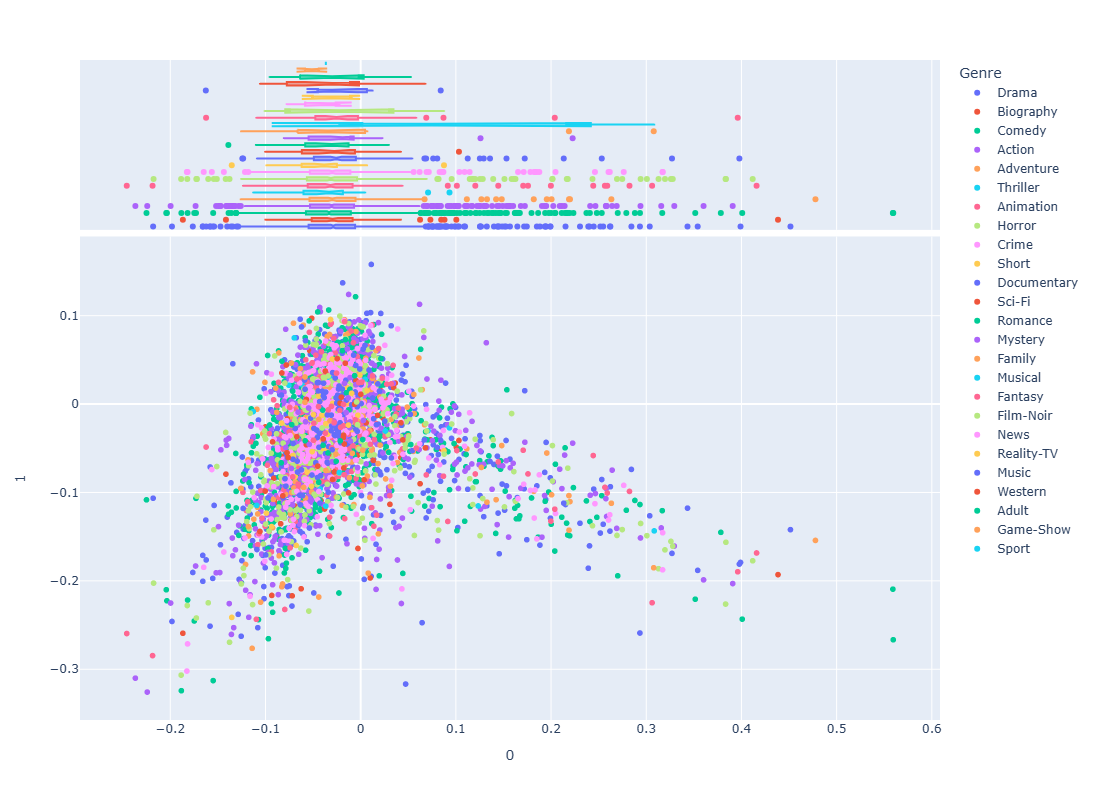

In [18]:
vis_pca(DCM, 0, 1, label='Genre')

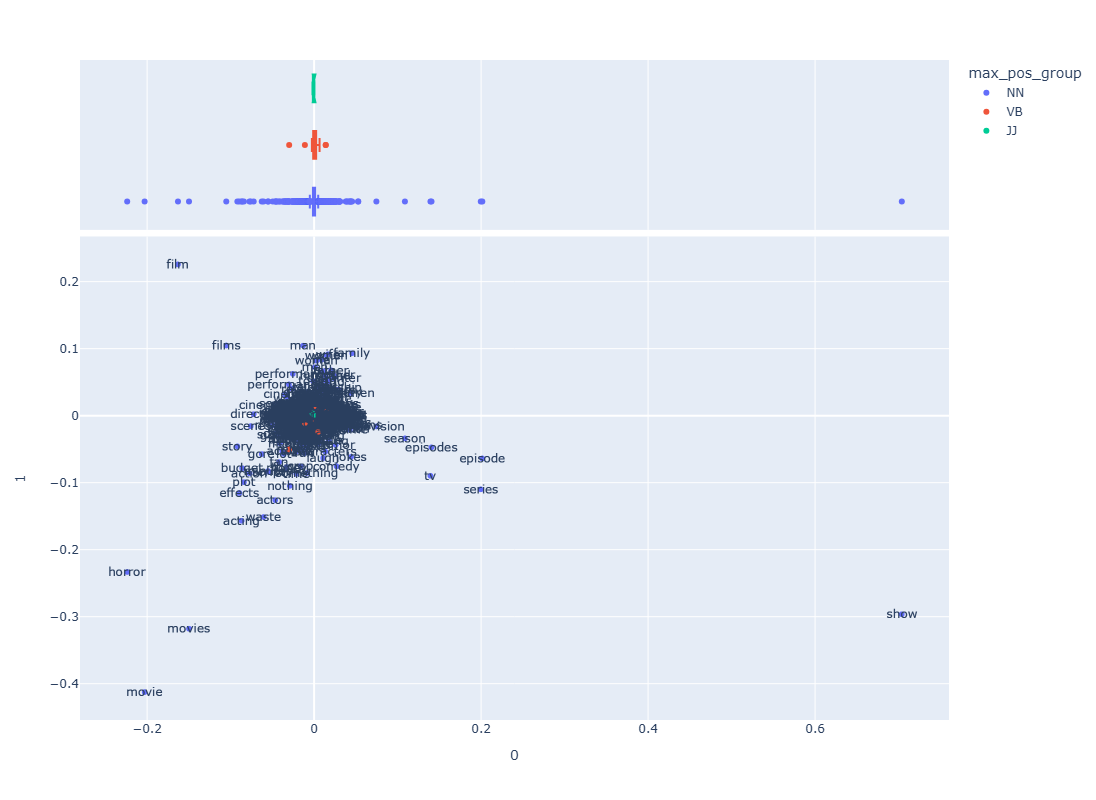

In [19]:
vis_loadings(0,1)

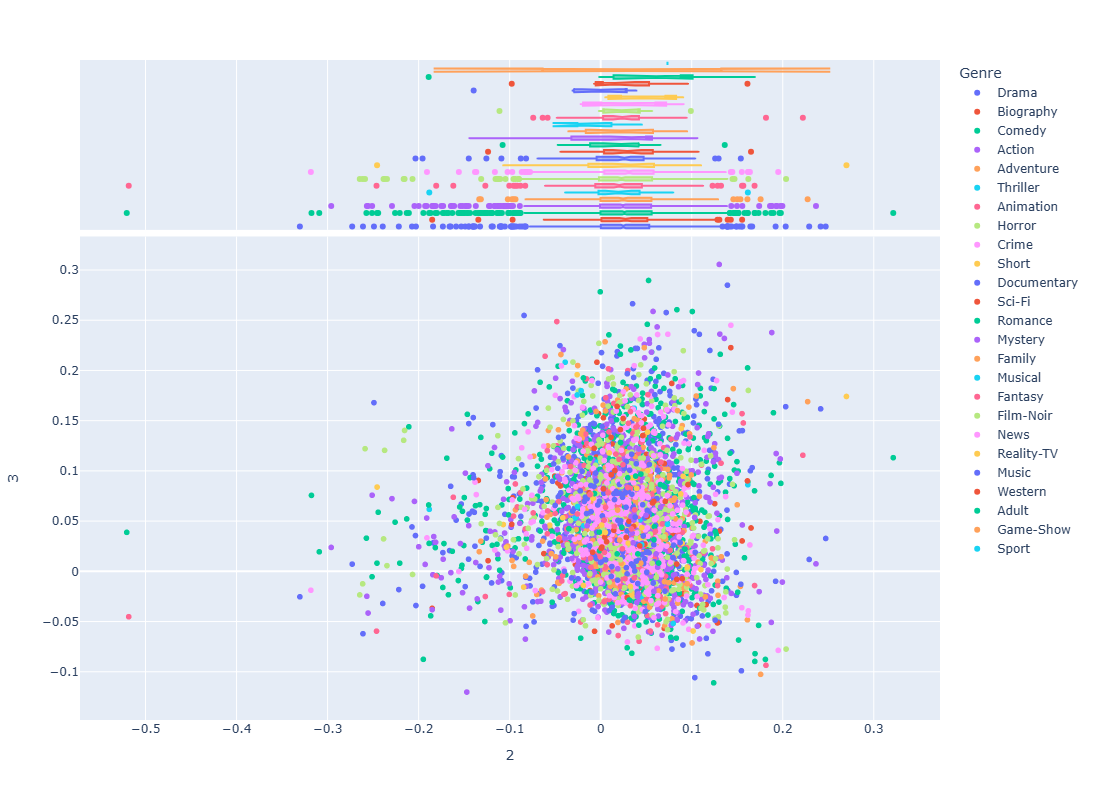

In [20]:
vis_pca(DCM, 2, 3, label='Genre')

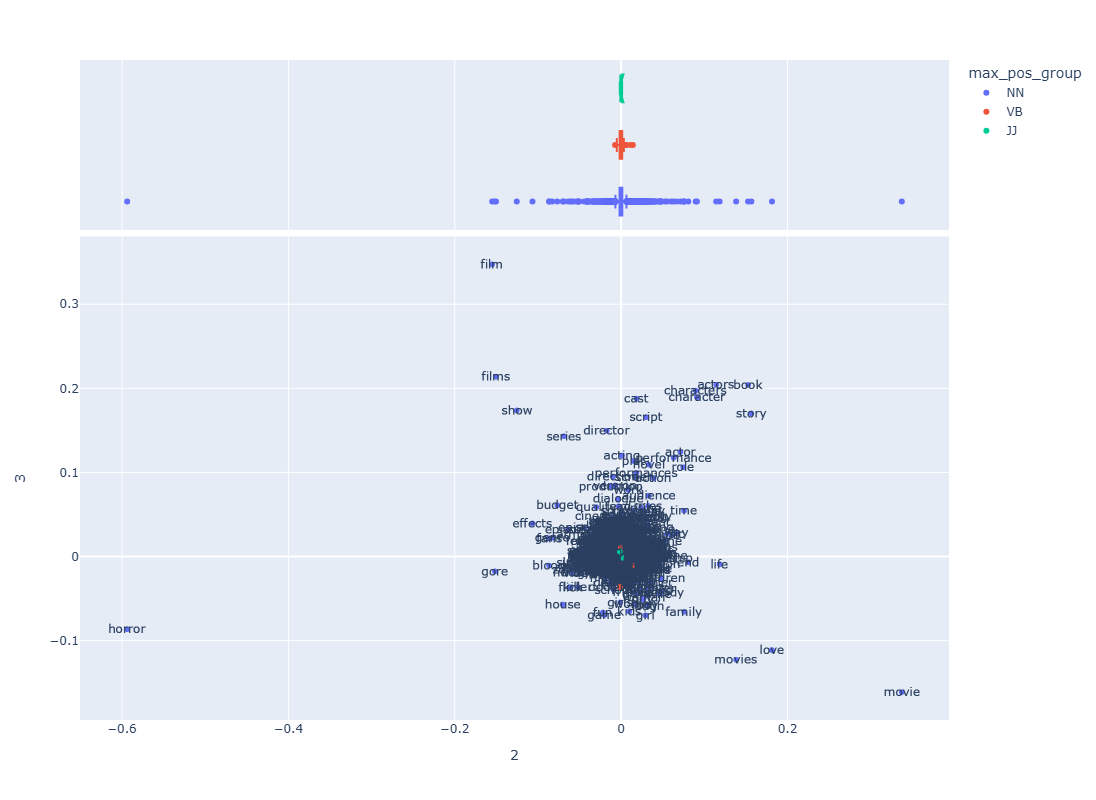

In [21]:
vis_loadings(2,3)